# Chapter 5 - Residuals

## Setup

Run Python file to import libraries and custom functions

In [1]:
%run libraries.py

/Users/joefarrington/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Set paths for data and results

In [2]:
data_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Data for import/'
results_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Results/Ch5resid/'

Define a string to be added to the name of all saved results from this notebook

In [3]:
nbname = 'Ch5resid'

Import the non-syndromic IQ subset

In [4]:
X_idio_IQ = pd.read_csv(data_path+'X_idio_IQ.csv', index_col=0)
y_idio_IQ = pd.read_csv(data_path+'y_idio_IQ.csv', index_col=0)

Import the syndromic IQ subset

In [5]:
X_synd_raw = pd.read_csv(data_path+'X_synd_IQ.csv', index_col=0)
y_all = np.array(pd.read_csv(data_path+'y_synd_IQ.csv', index_col=0, header=None)).reshape(-1,)

Define an sklearn scorer object to calculate the Matthews Correlation Coefficient (MCC)

In [6]:
mcc_scorer = make_scorer(matthews_corrcoef)

## Train the Linear Regression models on the non-syndromic IQ subset and calculate the residuals on the syndromic dataset

Extract the IQ column for the non-syndromic individuals

In [9]:
Xreg = np.array(X_idio_IQ['IQ']).reshape(-1,1)

List out all the ADI-R responses, we will train a Linear Regression model to predict each based on IQ

In [16]:
responses = ['adi_50m', 'adi_51m', 'adi_57m','adi_49m', 'adi_62m', 'adi_63m', 'adi_52m', 'adi_53m', 'adi_54m',
'adi_31e', 'adi_55m', 'adi_56m', 'adi_58e', 'adi_59m', 'adi_42m',
'adi_43m', 'adi_44m', 'adi_45m', 'adi_47m', 'adi_48m', 'adi_61m',
'adi_34e', 'adi_35e', 'adi_33e', 'adi_36e', 'adi_37e', 'adi_38e',
'adi_67e', 'adi_68e', 'adi_39e', 'adi_70e', 'Item64_65', 'Item77_78','Item69_71']

Create an empty dictionary to hold the Linear Regression models

In [11]:
reg_models = {}

Train a Linear Regression model to predict each beahviour, based on IQ.

In [12]:
for resp in responses:
    yreg = np.array(X_idio_IQ[resp]).reshape(-1,)
    reg_models[resp] = LinearRegression().fit(Xreg, yreg)

Save the Linear Regression models

In [15]:
pickle.dump(reg_models, open(results_path+"IQregression_models.p", "wb" ))

Load the Linear Regression models

In [4]:
reg_models = pickle.load(open(results_path+"IQregression_models.p", "rb" ))

Extract the IQ for the syndromic individuals

In [17]:
IQ_synd = np.array(X_synd_raw['IQ']).reshape(-1,1)

Create an empty dataframe to store the residuals

In [18]:
X_all = pd.DataFrame()

Calculate and store the residuals

In [19]:
for resp in responses:
    X_all[resp] = X_synd_raw[resp] - reg_models[resp].predict(IQ_synd)

Save the dataframe with the residuals for use with the Naive Bayes models

In [61]:
X_all.to_csv(data_path+'X_residuals.csv')

### Look at the regression coefficients

Create a dataframe to store the coefficients

In [17]:
empty_matrix = np.zeros((len(responses),2))
coef_df = pd.DataFrame(empty_matrix, index = responses, columns = ['Slope', 'Intercept'])

Loop through the linear regression models and add the coefficients to the dataframe

In [21]:
for resp in responses:
    coef_df.loc[resp,'Slope'] = reg_models[resp].coef_
    coef_df.loc[resp,'Intercept'] = reg_models[resp].intercept_

Print the dataframe, sorted by value of the slope parameter

In [23]:
coef_df.sort_values(by='Slope')

,Slope,Intercept
adi_52m,-0.014779,2.105626
Item77_78,-0.013839,1.947384
adi_49m,-0.013779,2.402923
Item64_65,-0.013715,2.159755
adi_42m,-0.013653,2.033175
adi_48m,-0.013547,2.368029
adi_31e,-0.012675,1.556770
Item69_71,-0.012673,2.108269
adi_43m,-0.012590,1.604742
adi_45m,-0.012386,2.029323


## Model 1: OvO SVM with RBF kernel

Define the number of train/test splits and the number of folds for cross-validation

In [6]:
n_repeats = 50
n_folds = 10

Define the model

In [22]:
svc_rbf = SVC(decision_function_shape='ovo', kernel='rbf')
steps_rbf = [('scaler', StandardScaler()),
     ('model',svc_rbf)]
pipeline_rbf = Pipeline(steps_rbf)

Define the parameters for the grid search

In [23]:
rbf_C_range = np.logspace(start=-5, stop=15, num=21, base=2)
rbf_gamma_range = np.logspace(start=-15, stop=3, num=19, base=2)
rbf_parameters = dict(model__gamma=rbf_gamma_range, model__C=rbf_C_range)

Run the evaluation procedure

In [24]:
svm_rbf_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rbf_parameters, pipeline_rbf, mcc_scorer, verbose=1)

Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1047 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 3047 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 3975 out of 3990 | elapsed:   20.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 0 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 1 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 2 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 3 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 4 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 5 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 6 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 7 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 8 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   23.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 9 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 3360 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 10 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 11 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   22.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 12 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 3360 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 13 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 14 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 15 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 16 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 17 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 18 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 19 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 20 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 21 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 22 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 23 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 24 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 25 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 26 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   19.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 27 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 28 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 29 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   19.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 30 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 3360 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   22.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 31 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 32 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 33 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 34 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 35 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   19.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 36 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 37 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 38 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 39 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   22.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 40 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 41 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 42 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 43 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 44 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 45 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 46 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 47 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 48 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   10.7s


Run 49 completed
Mean test accuracy: 0.4312871287128712
Std dev test accuracy: 0.04859197749056407
Mean test MCC: 0.35617929108468055
Std dev test MCC: 0.05537415866094102


[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   22.3s finished


Save the results

In [25]:
pickle.dump(svm_rbf_dict, open(results_path+f"svm_rbf_dict_{nbname}.p", "wb" ))

Load the results

In [4]:
svm_rbf_dict = pickle.load(open(results_path+f"svm_rbf_dict_{nbname}.p", "rb" ))

Plot a normalized confusion matrix

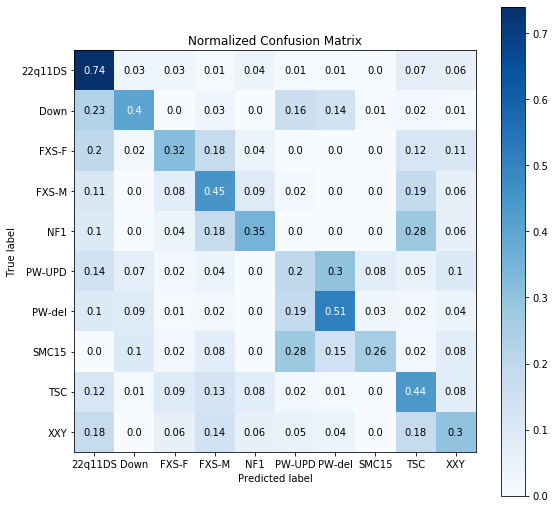

In [27]:
plot_confusion_matrix(svm_rbf_dict["cmdf"]["label"],svm_rbf_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [7]:
print_test_res(svm_rbf_dict, n_repeats)

Mean test accuracy: 0.4312871287128712
Std dev test accuracy: 0.04859197749056407
Mean test MCC: 0.35617929108468055
Std dev test MCC: 0.05537415866094102


## Model 2: OvO SVM with linear kernel

Define the number of train/test splits and the number of folds for cross-validation

In [28]:
n_repeats = 50
n_folds = 10

Define the model

In [29]:
svc_lin = SVC(decision_function_shape='ovo', kernel='linear')
steps_lin = [('scaler', StandardScaler()),
     ('model',svc_lin)]
pipeline_lin = Pipeline(steps_lin)

Define the parameters for the grid search

In [30]:
lin_C_range = np.logspace(start=-10, stop=10, num=21, base=2)
lin_parameters = dict(model__C=lin_C_range)

Run the evaluation procedure

In [31]:
svm_lin_dict = repeated_training(X_all, y_all, n_repeats, n_folds, lin_parameters, 
                                 pipeline_lin, mcc_scorer, verbose=1)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   33.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 0 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   42.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 1 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   32.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 2 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   31.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 3 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   40.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 4 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   39.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 5 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   43.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 6 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 7 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 8 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   37.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 9 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   23.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 10 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   48.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 11 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 12 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   21.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 13 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   45.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 14 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   26.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 15 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   23.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 16 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   22.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 17 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   42.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 18 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   38.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 19 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 20 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   39.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 21 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   35.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 22 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   26.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 23 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   29.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 24 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   35.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 25 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 26 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   46.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 27 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   43.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 28 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   33.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 29 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 30 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   40.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 31 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   57.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 32 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   28.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 33 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 34 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   43.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 35 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 36 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   29.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 37 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 38 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 39 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 40 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   51.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 41 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   48.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 42 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 43 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   34.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 44 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   44.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 45 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   52.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 46 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   40.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 47 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 48 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Run 49 completed
Mean test accuracy: 0.4073267326732674
Std dev test accuracy: 0.04014531002579198
Mean test MCC: 0.32901971220362486
Std dev test MCC: 0.04568866841578466


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   37.2s finished


Save the results

In [32]:
pickle.dump(svm_lin_dict, open(results_path+f"svm_lin_dict_{nbname}.p", "wb" ))

Load the results

In [8]:
svm_lin_dict = pickle.load(open(results_path+f"svm_lin_dict_{nbname}.p", "rb" ))

Plot a normalized confusion matrix

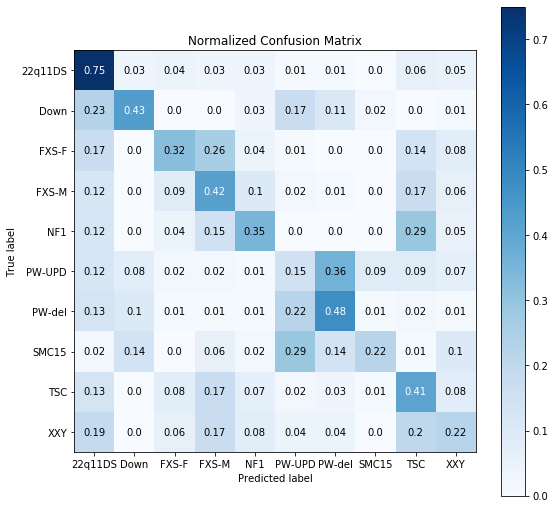

In [34]:
plot_confusion_matrix(svm_lin_dict["cmdf"]["label"],svm_lin_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [9]:
print_test_res(svm_lin_dict, n_repeats)

Mean test accuracy: 0.4073267326732674
Std dev test accuracy: 0.04014531002579198
Mean test MCC: 0.32901971220362486
Std dev test MCC: 0.04568866841578466


## Model 3: Naive Bayes (learn prior)

See '<b>Naive Bayes in R.ipynb</b>'

Load in the results

In [8]:
NB_noprior = pd.read_csv(results_path+'IQresid_noprior_allpreds.csv', index_col=0)

Plot a normalized confusion matrix

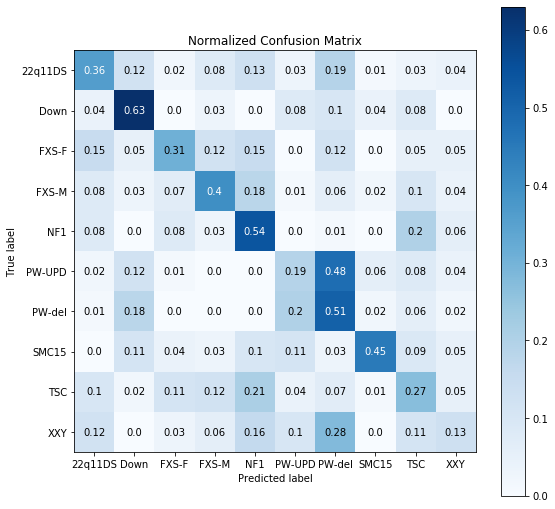

In [9]:
plot_confusion_matrix(NB_noprior['ytrue'],NB_noprior['ypred'], figsize=(9,9), normalize=True);

## Model 4: Naive Bayes (uniform prior) 

See '<b>Naive Bayes in R.ipynb</b>'

Load in the results

In [10]:
NB_uniprior = pd.read_csv(results_path+'IQresid_uniprior_allpreds.csv', index_col=0)

Plot a normalized confusion matrix

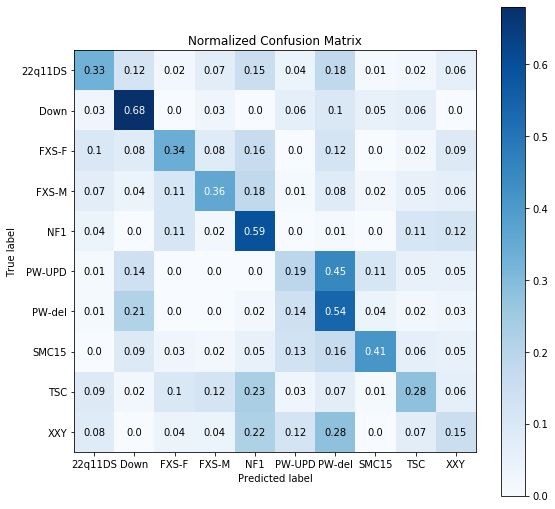

In [11]:
plot_confusion_matrix(NB_uniprior['ytrue'],NB_uniprior['ypred'], figsize=(9,9), normalize=True);

## Model 5: Standard Random Forest

Define the number of train/test splits and the number of folds for cross-validation

In [40]:
n_repeats = 50
n_folds = 10

Define the model

In [41]:
rfc_naive = RandomForestClassifier()

Define the parameters for the grid search

In [42]:
n_features = X_all.shape[1]
default_mtry = np.sqrt(n_features)
rfc_parameters = {'max_features': [int(0.5*default_mtry), int(default_mtry), int(1.5*default_mtry), int(2*default_mtry), int(3*default_mtry)],
             'n_estimators': [2000], 'min_samples_leaf': [1,2, 3, 4, 5]}

Run the evaluation procedure

In [43]:
rfc_naive_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rfc_parameters, rfc_naive, mcc_scorer, verbose=1)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 0 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 1 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.0min finished


Run 2 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 3 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 4 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.9min finished


Run 5 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 6 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 7 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 8 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 9 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.5min finished


Run 10 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 11 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 12 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


Run 13 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


Run 14 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 15 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


Run 16 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


Run 17 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 18 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 19 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 20 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 21 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 22 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 23 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 24 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


Run 25 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.5min finished


Run 26 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.5min finished


Run 27 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 28 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 29 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 30 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 31 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 32 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 33 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 34 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 35 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 36 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 37 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 38 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 39 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 40 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Run 41 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 42 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 43 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 44 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 45 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 46 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 47 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Run 48 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Run 49 completed
Mean test accuracy: 0.4645544554455446
Std dev test accuracy: 0.041245200354693326
Mean test MCC: 0.39271766680265185
Std dev test MCC: 0.04757149774351836


Save the results

In [44]:
pickle_dump(rfc_naive_dict, results_path+f"rfc_naive_dict_{nbname}.p")

writing total_bytes=2792446566...
writing bytes [0, 1073741824)... done.
writing bytes [1073741824, 2147483648)... done.
writing bytes [2147483648, 2792446566)... done.


Load the results

In [10]:
rfc_naive_dict = pickle_load(results_path+f"rfc_naive_dict_{nbname}.p")

Plot a normalized confusion matrix

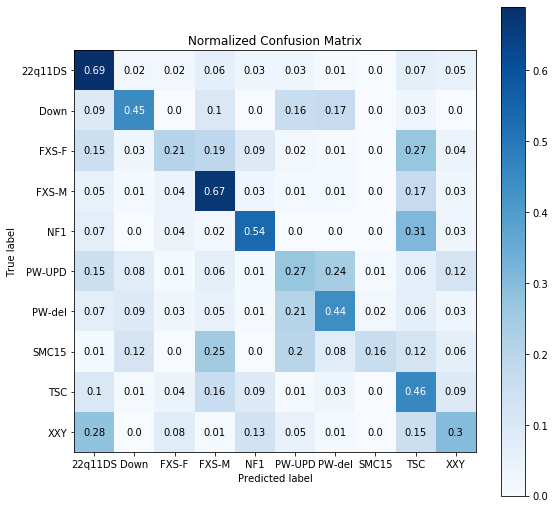

In [46]:
plot_confusion_matrix(rfc_naive_dict["cmdf"]["label"],rfc_naive_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [11]:
print_test_res(rfc_naive_dict, n_repeats)

Mean test accuracy: 0.4645544554455446
Std dev test accuracy: 0.041245200354693326
Mean test MCC: 0.39271766680265185
Std dev test MCC: 0.04757149774351836


## Model 6: Balanced Random Forest

Define the number of train/test splits and the number of folds for cross-validation

In [47]:
n_repeats = 50
n_folds = 10

Define the model

In [48]:
rfc_bal = BalancedRandomForestClassifier()

Define the parameters for the grid search

In [49]:
n_features = X_all.shape[1]
default_mtry = np.sqrt(n_features)
rfc_parameters = {'max_features': [int(0.5*default_mtry), int(default_mtry), int(1.5*default_mtry), int(2*default_mtry), int(3*default_mtry)],
             'n_estimators': [2000], 'min_samples_leaf': [1,2, 3, 4, 5]}

Run the evaluation procedure

In [50]:
rfc_bal_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rfc_parameters, rfc_bal, mcc_scorer, verbose=1)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.5min finished


Run 0 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.5min finished


Run 1 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.6min finished


Run 2 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.0min finished


Run 3 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.0min finished


Run 4 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 5 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.0min finished


Run 6 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.0min finished


Run 7 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.4min finished


Run 8 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


Run 9 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


Run 10 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


Run 11 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


Run 12 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


Run 13 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.4min finished


Run 14 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.3min finished


Run 15 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.3min finished


Run 16 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


Run 17 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.6min finished


Run 18 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.3min finished


Run 19 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.7min finished


Run 20 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.0min finished


Run 21 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


Run 22 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.5min finished


Run 23 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.0min finished


Run 24 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 25 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


Run 26 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.4min finished


Run 27 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.4min finished


Run 28 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.8min finished


Run 29 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.4min finished


Run 30 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.0min finished


Run 31 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 32 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 33 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.3min finished


Run 34 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


Run 35 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 36 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 37 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.7min finished


Run 38 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.0min finished


Run 39 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 40 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 41 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 42 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 43 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 44 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 45 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 46 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 47 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 48 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Run 49 completed
Mean test accuracy: 0.4172277227722772
Std dev test accuracy: 0.04878727313349231
Mean test MCC: 0.35884437871568514
Std dev test MCC: 0.05416524054106233


Save the results

In [51]:
pickle_dump(rfc_bal_dict, results_path+f"rfc_bal_dict_{nbname}.p")

writing total_bytes=2644483816...
writing bytes [0, 1073741824)... done.
writing bytes [1073741824, 2147483648)... done.
writing bytes [2147483648, 2644483816)... done.


Load the results

In [12]:
rfc_bal_dict = pickle_load(results_path+f"rfc_bal_dict_{nbname}.p")

Plot a normalized confusion matrix

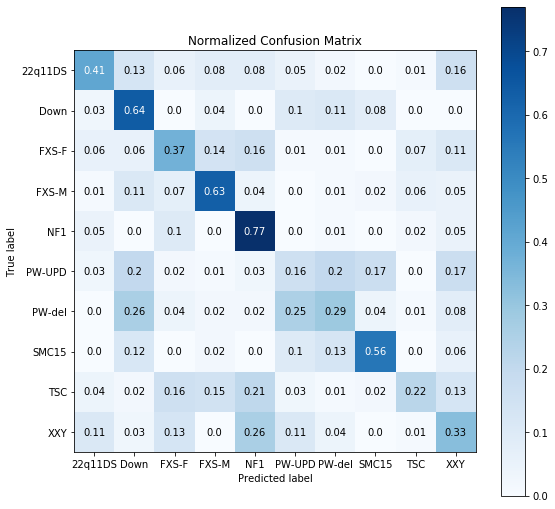

In [53]:
plot_confusion_matrix(rfc_bal_dict["cmdf"]["label"],rfc_bal_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [13]:
print_test_res(rfc_bal_dict, n_repeats)

Mean test accuracy: 0.4172277227722772
Std dev test accuracy: 0.04878727313349231
Mean test MCC: 0.35884437871568514
Std dev test MCC: 0.05416524054106233


## Model 7: Weighted Random Forest

Define the number of train/test splits and the number of folds for cross-validation

In [54]:
n_repeats = 50
n_folds = 10

Define the model

In [55]:
rfc_weighted = RandomForestClassifier(class_weight = 'balanced_subsample')

Define the parameters for the grid search

In [56]:
n_features = X_all.shape[1]
default_mtry = np.sqrt(n_features)
rfc_parameters = {'max_features': [int(0.5*default_mtry), int(default_mtry), int(1.5*default_mtry), int(2*default_mtry), int(3*default_mtry)],
             'n_estimators': [2000], 'min_samples_leaf': [1,2, 3, 4, 5]}

Run the evaluation procedure

In [57]:
rfc_weighted_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rfc_parameters, rfc_weighted, mcc_scorer, verbose=1)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.7min finished


Run 0 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.3s
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 1 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 2 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 3 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 4 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 5 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 6 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 7 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 8 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 9 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 10 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 11 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 12 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 13 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 14 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 15 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 16 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 17 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 18 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 19 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 20 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 21 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 22 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 23 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 24 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 25 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 26 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 27 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 28 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 29 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.2min finished


Run 30 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 31 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 32 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 33 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 34 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 35 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 36 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 37 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 38 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 39 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 40 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 41 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 42 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 43 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 44 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 45 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.2min finished


Run 46 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 47 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 48 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 49 completed
Mean test accuracy: 0.454059405940594
Std dev test accuracy: 0.03875374510332362
Mean test MCC: 0.3852414600972062
Std dev test MCC: 0.04408248131085144


Save the results

In [58]:
pickle_dump(rfc_weighted_dict, results_path+f"rfc_weighted_dict_{nbname}.p")

writing total_bytes=2685159944...
writing bytes [0, 1073741824)... done.
writing bytes [1073741824, 2147483648)... done.
writing bytes [2147483648, 2685159944)... done.


Load the results

In [14]:
rfc_weighted_dict = pickle_load(results_path+f"rfc_weighted_dict_{nbname}.p")

Plot a normalized confusion matrix

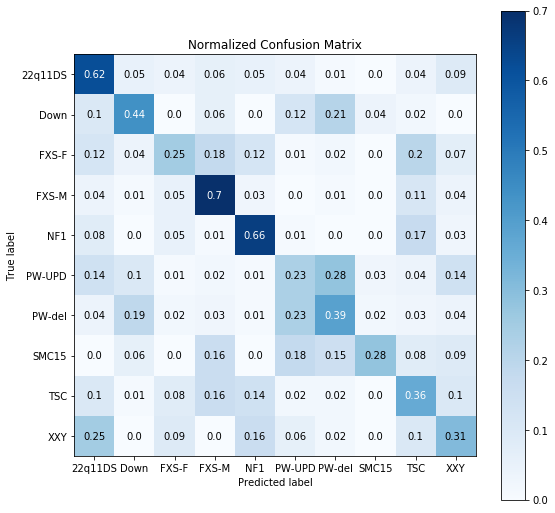

In [60]:
plot_confusion_matrix(rfc_weighted_dict["cmdf"]["label"],rfc_weighted_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [15]:
print_test_res(rfc_weighted_dict, n_repeats)

Mean test accuracy: 0.454059405940594
Std dev test accuracy: 0.03875374510332362
Mean test MCC: 0.3852414600972062
Std dev test MCC: 0.04408248131085144
